In [1]:
import sys
import tensorflow as tf
import platform
import pandas as pd
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.2.1-arm64-arm-64bit
Tensor Flow Version: 2.9.0
Python 3.9.16 (main, Jan 11 2023, 10:02:19) 
[Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.1
SciPy 1.10.1
GPU is available


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

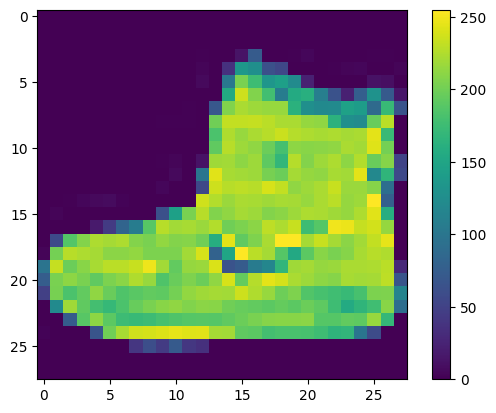

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

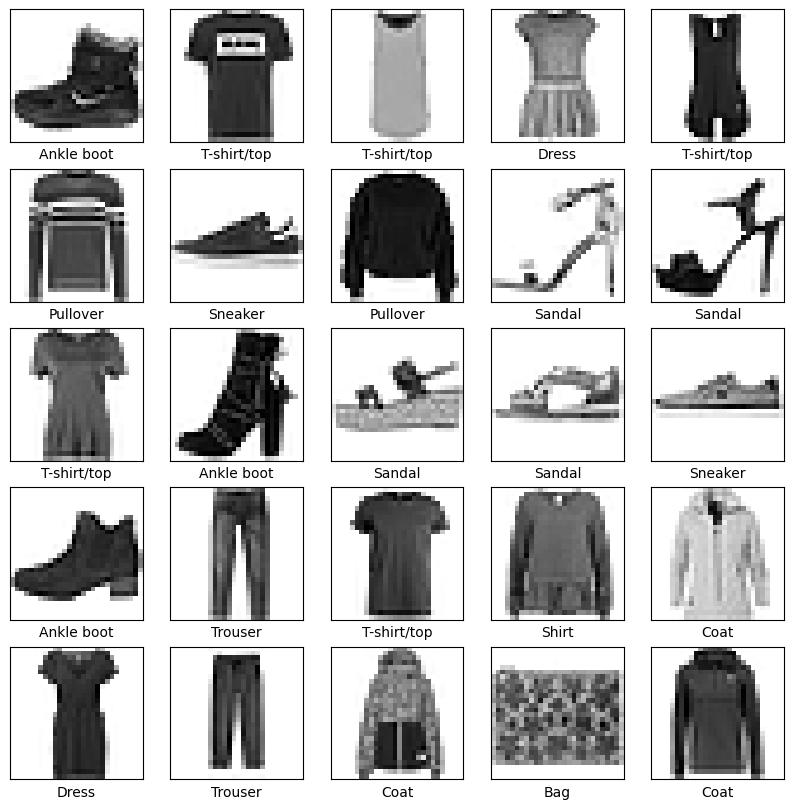

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Metal device set to: Apple M2


2023-03-25 19:17:19.732980: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-25 19:17:19.733271: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2023-03-25 19:17:28.145197: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-25 19:17:28.270158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4989 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3753 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3384 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3135 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2961 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2812 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2692 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2590 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2501 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2394 - accurac

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2023-03-25 19:18:39.953200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3393 - accuracy: 0.8847 - 981ms/epoch - 3ms/step

Test accuracy: 0.8847000598907471


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

206/313 [==================>...........] - ETA: 0s

2023-03-25 19:18:47.720797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 758us/step


In [18]:
predictions[0]

array([3.18273919e-06, 2.46856501e-07, 2.83774995e-07, 1.12629825e-08,
       6.47165095e-08, 6.18866819e-04, 3.08507822e-07, 1.68785118e-02,
       9.94449536e-08, 9.82498407e-01], dtype=float32)

In [19]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

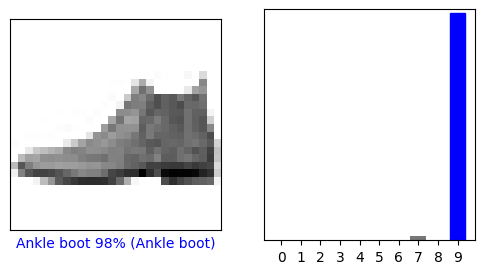

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

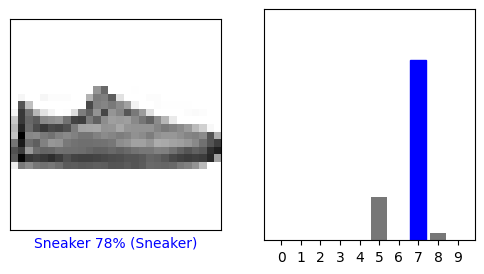

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

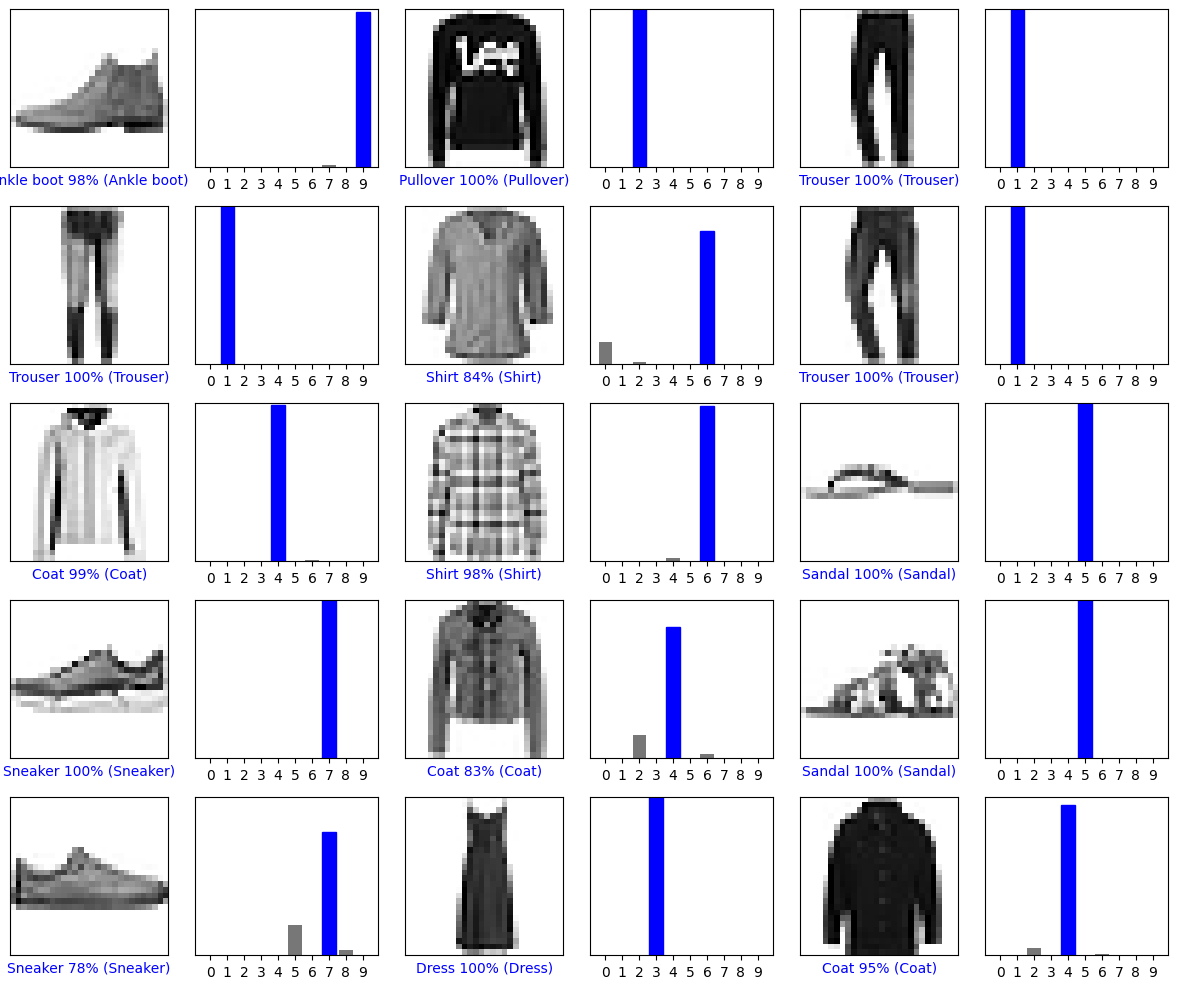

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 296ms/step
[[2.0186894e-06 1.5363023e-12 9.9928135e-01 5.0100875e-09 6.3596270e-04
  1.8947833e-16 8.0683807e-05 1.7539244e-18 1.7324633e-09 2.1431273e-16]]


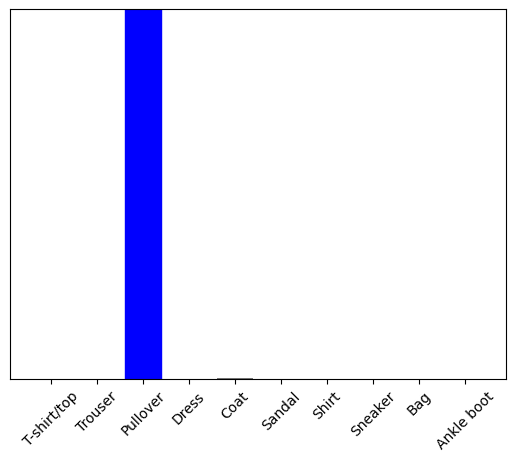

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
class_names[np.argmax(predictions_single[0])]

'Pullover'

In [34]:
predictions

array([[3.1827392e-06, 2.4685650e-07, 2.8377499e-07, ..., 1.6878512e-02,
        9.9444954e-08, 9.8249841e-01],
       [2.0186867e-06, 1.5362862e-12, 9.9928135e-01, ..., 1.7539196e-18,
        1.7324541e-09, 2.1431219e-16],
       [2.1734460e-10, 1.0000000e+00, 8.7722262e-14, ..., 2.1998331e-31,
        1.3104958e-13, 6.1503391e-21],
       ...,
       [9.3785711e-06, 6.3607941e-10, 4.8603272e-07, ..., 4.7598683e-12,
        9.9998784e-01, 6.7552834e-15],
       [1.7238738e-09, 9.9999976e-01, 5.3444287e-11, ..., 1.4469555e-16,
        4.7070885e-11, 3.8431464e-14],
       [5.8419439e-05, 1.3433254e-06, 1.1666323e-05, ..., 1.0516403e-02,
        8.0129434e-04, 2.2741211e-05]], dtype=float32)

In [31]:
test_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [32]:
list(test_labels)

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 9,
 1,
 4,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 3,
 7,
 6,
 7,
 2,
 1,
 2,
 2,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 3,
 9,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 6,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 6,
 2,
 2,
 4,
 4,
 1,
 4,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 4,
 5,
 6,
 9,
 2,
 6,
 8,
 6,
 4,
 2,
 2,


In [35]:
prediction_labels = []

for prediction in predictions:
    lab = np.argmax(prediction)
    prediction_labels.append(lab)

In [39]:
print(prediction_labels)


[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 3, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 2, 2, 4, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 2, 1, 0, 4, 0, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 6, 2, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 7, 0, 

In [40]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [41]:
cm = confusion_matrix(test_labels, prediction_labels)

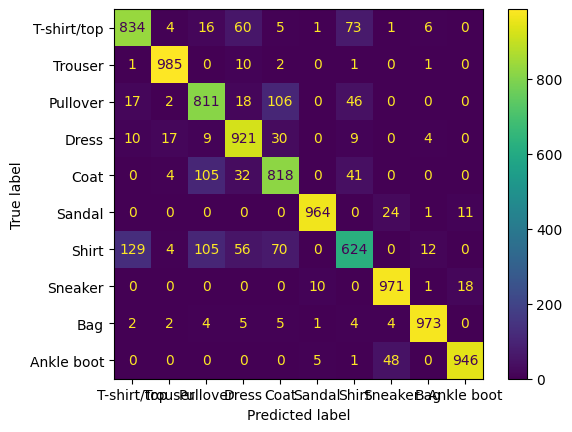

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot()

plt.show()